In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import itertools

import tensorflow as tf
from tensorflow.keras.layers import Input,SimpleRNN,GRU,LSTM,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD,Adam

I am loading the data.

In [2]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test  = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

train.shape, test.shape

((42000, 785), (28000, 784))

The train dataset can be split into X_train and y_train variables, where the first contains the images and the second the labels.

In [3]:
X_train = train.drop('label',axis=1)
y_train = train['label']

X_test = test.copy()

Text(0.5, 1.0, 'Labels and their counts')

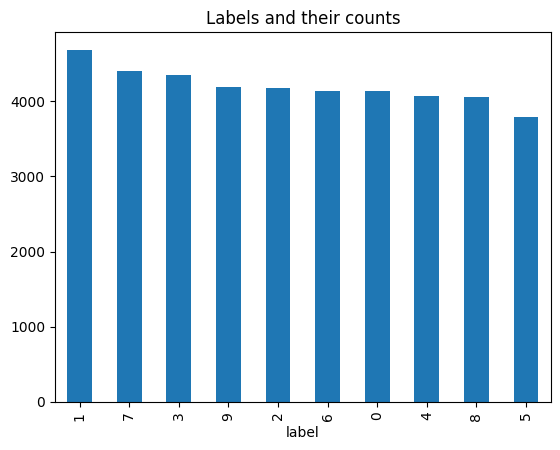

In [4]:
#digit_count = y_train.value_counts().reset_index(name='count').sort_values(by='count',ascending=False)
#digit_count['label'] = digit_count['label'].astype(str)

y_train.value_counts().plot(kind='bar',legend=None)
plt.title('Labels and their counts')

I have to normalize the data by dividing each value by 255. These values (running from 0 to 255, i.e. on the grey scale) are the color of each pixel in the image.

In [5]:
# Normalize the data
X_train = X_train / 255.0
X_test  = X_test / 255.0

Then, I am reshaping the data by turning a 784 one-dimensional array into a 28x28 two-dimensional matrix.

In [6]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
X_test  = X_test.values.reshape(-1,28,28,1)

In [7]:
list_numbers = list(y_train.unique())
list_numbers.sort()
list_numbers = [str(x) for x in list_numbers]

list_numbers

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

I am printing a random image in the train dataset and also its label.

Text(0.5, 1.0, 'Encoded label: 0')

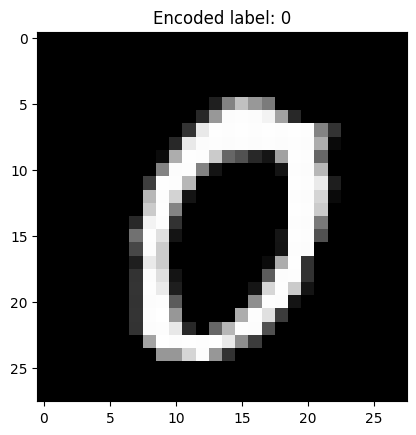

In [8]:
classes = y_train.unique().astype(str)

i = np.random.choice(len(X_train))
plt.imshow(X_train[i],cmap='gray')
plt.title(f"Encoded label: {y_train[i]}")

# 1. First Model

The first model that I consider has:
* A flatten layer to reshape the input from 28 x 28 back to 784. The input is a tensor (28,28), corresponding to the dimension of the train samples.
* Two dense layers with a relu activation function. The number of neurons in each layer is arbitrary.
* A final dense layer with a softmax activation function. The output shape (10) corresponds to the 10 different classes in the dataset.

In [9]:
# Train-validation splitting
X_train2,X_validation,y_train2,y_validation = train_test_split(X_train,y_train,
                                                             test_size=0.3,random_state=0)

# Set random seed
tf.random.set_seed(42)

# Create the model
model1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)), 
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(25, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])

# Compile the model
model1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
history1 = model1.fit(X_train2,y_train2,
                            epochs=100,validation_data=(X_validation,y_validation))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
919/919 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7823 - loss: 0.7435 - val_accuracy: 0.9314 - val_loss: 0.2367
Epoch 2/100
919/919 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9407 - loss: 0.2017 - val_accuracy: 0.9448 - val_loss: 0.1914
Epoch 3/100
919/919 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9548 - loss: 0.1485 - val_accuracy: 0.9511 - val_loss: 0.1690
Epoch 4/100
919/919 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9623 - loss: 0.1185 - val_accuracy: 0.9549 - val_loss: 0.1570
Epoch 5/100
919/919 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9700 - loss: 0.0959 - val_accuracy: 0.9570 - val_loss: 0.1544
Epoch 6/100
919/919 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9755 - loss: 0.0794 - val_accuracy: 0.9571 - val_loss: 0.1555
Epoch 7/100
919/919 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9800 - loss: 0.0661 - val_accuracy: 0.9560 - val_loss: 0.1615
Epoch 8/100
919/919 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9830 - loss: 0.0559 - val_accu

KeyboardInterrupt: 

I am printing the model summary, with a list of its layers and parameters.

In [ ]:
model1.summary()

In [ ]:
plt.plot(history1.history['loss'],label='train loss')
plt.plot(history1.history['val_loss'],label='validation loss')
plt.xlabel('epochs',fontsize=12)
plt.ylabel('loss',fontsize=12)
plt.legend()

plt.title('Train and Validation Losses of Model #1',fontsize=20)

plt.tight_layout()
plt.gca().set_facecolor('gainsboro')
plt.gcf().patch.set_facecolor('lightsteelblue')

In [ ]:
plt.plot(history1.history['accuracy'],label='train accuracy')
plt.plot(history1.history['val_accuracy'],label='validation accuracy')
plt.xlabel('epochs',fontsize=12)
plt.ylabel('accuracy',fontsize=12)
plt.legend()

plt.title('Train and Validation Accuracies of Model #1',fontsize=18)

plt.tight_layout()
plt.gca().set_facecolor('gainsboro')
plt.gcf().patch.set_facecolor('lightsteelblue')

In [ ]:
score1 = model1.evaluate(X_validation,y_validation,verbose=0)
print('Test Loss : {:.3f}'.format(score1[0]))
print('Test Accuracy : {:.3f}'.format(score1[1]))

# 2. Second Model

In [ ]:
# The data is only 2D!
# Convolution expects height x width x color
X_train2 = np.expand_dims(X_train2,-1)
X_validation = np.expand_dims(X_validation,-1)
print(X_train2.shape, X_validation.shape)

In [ ]:
# Set random seed
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), strides=2, activation='relu', input_shape=X_train[0].shape),
  tf.keras.layers.Conv2D(64, (3,3), strides=2, activation='relu'),
  tf.keras.layers.Conv2D(128, (3,3), strides=2, activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.2),  
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.2),  
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
history2 = model2.fit(X_train2,y_train2,
                      epochs=100,
                      validation_data=(X_validation,y_validation))

In [ ]:
model2.summary()

In [ ]:
plt.plot(history2.history['loss'],label='train loss')
plt.plot(history2.history['val_loss'],label='validation loss')
plt.xlabel('epochs',fontsize=12)
plt.ylabel('loss',fontsize=12)
plt.legend()

plt.title('Train and Validation Losses of Model #2',fontsize=20)

plt.tight_layout()
plt.gca().set_facecolor('gainsboro')
plt.gcf().patch.set_facecolor('lightsteelblue')

In [ ]:
plt.plot(history2.history['accuracy'],label='train accuracy')
plt.plot(history2.history['val_accuracy'],label='validation accuracy')
plt.xlabel('epochs',fontsize=12)
plt.ylabel('accuracy',fontsize=12)
plt.legend()

plt.title('Train and Validation Accuracies of Model #2',fontsize=18)

plt.tight_layout()
plt.gca().set_facecolor('gainsboro')
plt.gcf().patch.set_facecolor('lightsteelblue')

I am comparing the accuracy of model #2 on the validation data to that of model #1.

In [ ]:
score2 = model2.evaluate(X_validation,y_validation,verbose=0)
print('Test Loss (Model #2): {:.3f}'.format(score2[0]))
print('Test Accuracy  (Model #2): {:.3f}'.format(score2[1]))

In [ ]:
print('Test Loss (Model #1): {:.3f}'.format(score1[0]))
print('Test Accuracy (Model #1): {:.3f}'.format(score1[1]))

# 3. Third Model

In [ ]:
# Set random seed
tf.random.set_seed(42)

model3 = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), activation="relu", padding="same",
                            input_shape=X_train[0].shape),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(128, (3,3), activation="relu", padding="same"),
        tf.keras.layers.Conv2D(128, (3,3), activation="relu", padding="same"),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(256, (3,3), activation="relu", padding="same"),
        tf.keras.layers.Conv2D(256, (3,3), activation="relu", padding="same"),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
history3 = model3.fit(X_train2,y_train2,
                      epochs=100,
                      validation_data=(X_validation,y_validation))

In [ ]:
model3.summary()

In [ ]:
plt.plot(history3.history['loss'],label='train loss')
plt.plot(history3.history['val_loss'],label='validation loss')
plt.xlabel('epochs',fontsize=12)
plt.ylabel('loss',fontsize=12)
plt.legend()

plt.title('Train and Validation Losses of Model #3',fontsize=20)

plt.tight_layout()
plt.gca().set_facecolor('gainsboro')
plt.gcf().patch.set_facecolor('lightsteelblue')

In [ ]:
plt.plot(history3.history['accuracy'],label='train accuracy')
plt.plot(history3.history['val_accuracy'],label='validation accuracy')
plt.xlabel('epochs',fontsize=12)
plt.ylabel('accuracy',fontsize=12)
plt.legend()

plt.title('Train and Validation Accuracies of Model #3',fontsize=18)

plt.tight_layout()
plt.gca().set_facecolor('gainsboro')
plt.gcf().patch.set_facecolor('lightsteelblue')

In [ ]:
score3 = model3.evaluate(X_validation,y_validation,verbose=0)
print('Test Loss (Model #3): {:.3f}'.format(score3[0]))
print('Test Accuracy  (Model #3): {:.3f}'.format(score3[1]))

In [ ]:
print('Test Loss (Model #2): {:.3f}'.format(score2[0]))
print('Test Accuracy (Model #2): {:.3f}'.format(score2[1]))

In [ ]:
print('Test Loss (Model #1): {:.3f}'.format(score1[0]))
print('Test Accuracy (Model #1): {:.3f}'.format(score1[1]))

# 4. Submit Predictions

In [ ]:
# predict results
results = model3.predict(X_test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [ ]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)